In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [12]:
DATA = pd.read_csv('madaline.csv')
X = np.asarray(DATA[DATA.columns[0:2]])
Y = np.asarray(DATA[DATA.columns[2]])

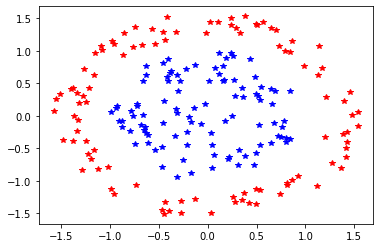

In [13]:
# Data of two classes
S = np.zeros((199, 2))
S[:100,:] = X[Y==1,:]
S[100:199,:] = X[Y==0,:]
T = np.zeros((199))
T[:100] = np.reshape(np.ones((100)) * (1), (100))
T[100:199] = np.reshape(np.ones((99)) * (-1), (99))
plt.plot(X[Y==1, 0], X[Y==1, 1], "*r")
plt.plot(X[Y==0, 0], X[Y==0, 1], "*b")

In [14]:
# AdaLine Network function
def lpn(x, t, w, b, alpha):
    net = sum(x * w) + b
    if net >= 0:
        h = 1
    else:
        h = -1

    costf = 0.5 * ((t - net) ** 2)
    wnew = w + alpha * x * (t - net)
    bnew = b + alpha * (t - net)

    return [costf, net, h, wnew, bnew]

In [15]:
def MADALINE(s, t, neurons_num):
    # Shuffle order of data of two classes and target as well
    index = list(range(len(S)))
    random.shuffle(index)
    s = s[index, :]
    t = t[index]

    # setting the parameters
    sample_num = len(s)
    max_epoch = 1000
    alpha = 0.01
    input_num = 2


    # initialize weights and biases
    mean = 0
    std = 1
    w = np.random.normal(mean, std, [neurons_num, input_num])
    b = np.random.normal(mean, std, [neurons_num, 1])
    # r = 0.07
    # w = np.random.uniform(-r, r, [neurons_num, input_num])
    # b = np.random.uniform(-r, r, [neurons_num, 1])
    v = np.ones((neurons_num, 1))
    b0 = 2

    # MR1 algorithm
    y = np.zeros((sample_num))
    zin = np.zeros((neurons_num, 1))
    z = np.zeros((neurons_num, 1))
    epoch = 0
    for k in range(max_epoch):
        epoch = epoch + 1
        for j in range(sample_num):
            x = s[j, :]
            tj = t[j]
            for i in range(neurons_num):
                wi = w[i, :]
                bi = b[i]
                [costf1, net, h, wnew, bnew] = lpn(x, tj, wi, bi, alpha)
                zin[i] = net
                z[i] = h

            [costf1, net, h, wnew, bnew] = lpn(z, tj, v, b0, alpha)
            y[j] = h
            if tj != y[j]:
                
                if tj == 1:
                    zz = abs(zin)
                    index = np.where(zz == min(zz))[0]
                    w[index, :] += alpha * x * (1 - zin[index])
                    b[index] += alpha * (1 - zin[index])

                elif tj == -1:
                    index = np.where(zin > 0)[0]
                    for k2 in index:
                        w[k2, :] += alpha * x * (-1 - zin[k2])
                        b[k2] += alpha * (-1 - zin[k2])
        # checking stop condition
        if all(y == t):
            break

    print("number of epochs is {}".format(epoch))

    # plot the result separating lines and data of 2 classes
    plt.figure()
    plt.plot(s[t==1, 0], s[t==1, 1], "*r")
    plt.plot(s[t==-1, 0], s[t==-1, 1], "*b")
    start = -2
    stop = 2
    step = 0.5
    for i in range(neurons_num):
        # w1x1 + w2x2 + w0 =0
        w1 = w[i, 0]
        w2 = w[i, 1]
        w0 = b[i]
        x1 = np.arange(start, stop, step)
        x2 = -(w1 * x1 + w0) / w2
        plt.plot(x1, x2, 'k')
    plt.axis([-2, 2, -2, 2])
    plt.show()

    print("The accuracy of the model is: %.1f%%" % (accuracy_score(y, t)*100))

number of epochs is 1000


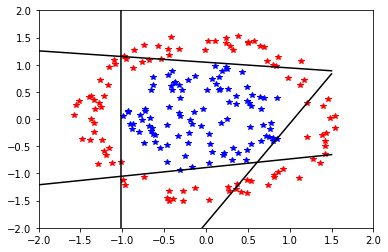

The accuracy of the model is: 94.0%


In [21]:
MADALINE(S, T, 4)

number of epochs is 1000


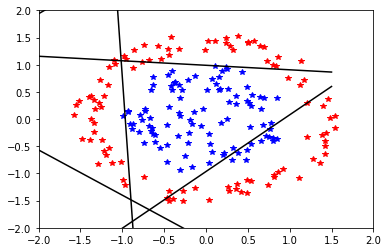

The accuracy of the model is: 88.9%


In [22]:
MADALINE(S, T, 6)

number of epochs is 45


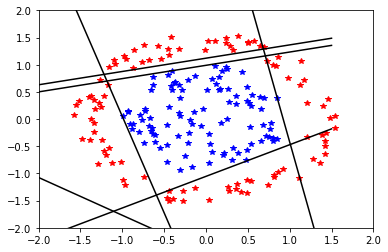

The accuracy of the model is: 100.0%


In [23]:
MADALINE(S, T, 8)